# Look at RW-bias disable intervals as a proxy for SCS-107 detection

SCS-107 temporarily disables the reaction wheel bias. This is the most reliable way to
detect an SCS-107 run in telemetry since the RW bias is otherwise always enabled during
normal operations.

Empirically, the RW bias is apparently disabled at times in Safe Mode.

The duration has changed through the years related to changes in SCS-107 timing.
Over the mission, using a filter of `500 s < duration < 1000 s` seems reasonable.

In [1]:
import astropy.table as apt
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cheta import fetch
from cxotime import CxoTime
from ska_matplotlib import plot_cxctime

matplotlib.style.use("bmh")

%matplotlib inline

In [2]:
def get_rw_disabled_intervals(year):
    start = CxoTime(f"{year}:001:00:00:00")
    stop = start + 1 * u.yr
    dat = fetch.Msid("aorwbias", start, stop)
    states = dat.state_intervals()
    ok = states["val"] == "DISA"
    return states[ok]

In [3]:
states_list = []
for year in range(1999, 2025):
    print(year)
    states = get_rw_disabled_intervals(year)
    states_list.append(states)

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


In [4]:
states = apt.vstack(states_list)

In [5]:
durs = states["duration"]

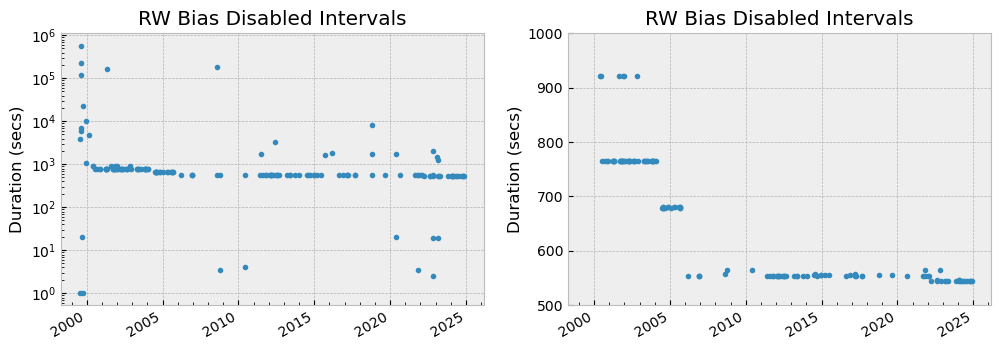

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, scale in zip(axes, ("log", "linear")):
    plot_cxctime(states["tstart"], states["duration"], ".", ax=ax)
    ax.set_ylabel("Duration (secs)")
    ax.set_title("RW Bias Disabled Intervals")
    ax.set_yscale(scale)
    if scale == "linear":
        ax.set_ylim(500, 1000)

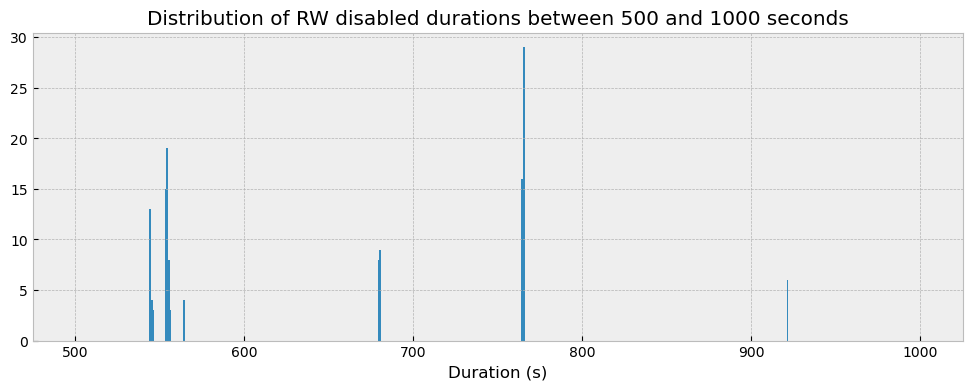

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Distribution of RW disabled durations between 500 and 1000 seconds")
ax.set_xlabel("Duration (s)")
plt.hist(durs, bins=np.linspace(500, 1000, 501));